In [1]:
import requests
import sys
from importlib import reload
import random
from IPython.core.display import HTML


import plotly.graph_objects as go
import plotly.io as plotIO
import pickle

import math
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import base64
from io import BytesIO
import json
import seaborn as sns
import diffxpy.api as de
import server.app.decode_fbs as decode_fbs
api_version = "/api/v0.2"

sc.set_figure_params(dpi=80, color_map='viridis')
sc.settings.verbosity = 2
sc.logging.print_versions()
rcParams.update({'figure.autolayout': True})

# height="300" width="300"
html= """
  <html><body>
  <img src="data:image/png;base64,{}"/>
  </body></html>
  """
class appConfig:
    server__host="127.0.0.1"
    server__port=8888
    
appC = appConfig()

#D = sc.read_h5ad("Data/tabula-muris.h5ad")

scanpy==1.4.7.dev152+g245a480 anndata==0.7.3 umap==0.4.4 numpy==1.18.5 scipy==1.4.1 pandas==1.0.4 scikit-learn==0.23.1 statsmodels==0.11.1


In [ ]:
D = sc.read_h5ad("Data/tabula-muris.h5ad")
D.obs['cluster'] = [random.randint(1,20) for x in range(D.obs.shape[0])]
cix = list(range(D.shape[0]))#random.sample(range(D.shape[0]),40000)
cells = {str(x):cix[x] for x in range(len(cix))}
selC = list(cells.values())
cNames = ["cell%d" %i for i in selC]
obs = D.obs.iloc[selC,:].loc[:,["mouse_sex","tissue"]].astype('str')#"cluster",,"cell_ontology_class"
obs.index = cNames

gNames = ['Fxyd3','Lgals7','Acta2','Krt5','Cd79a','Rac2','Coro1a']#['Btk','Cd93']#,'Acta2','Krt5','Cd79a','Rac2','Coro1a','Acta2','Krt5','Cd79a'
data={'genes':gNames,'grp':'tissue','cutoff':7,'mean_only_expressed':'Yes'}
fullG = list(D.var.index)
selG = [fullG.index(i) for i in gNames]#
X = D.X[selC][:,selG]
obs = obs.astype('category')
strEmbed = 'umap'
embed = pd.DataFrame(D.obsm['X_%s'%strEmbed][selC],columns=['%s1'%strEmbed,'%s2'%strEmbed],index=cNames)
adata = sc.AnnData(pd.DataFrame(X,columns=gNames,index=cNames),
                   obs,var=pd.DataFrame([],index=gNames),
                   obsm={'X_%s'%strEmbed:embed.to_numpy()})
#a = list(set(list(adata.obs['cluster'])))
#adata.to_df().to_csv()

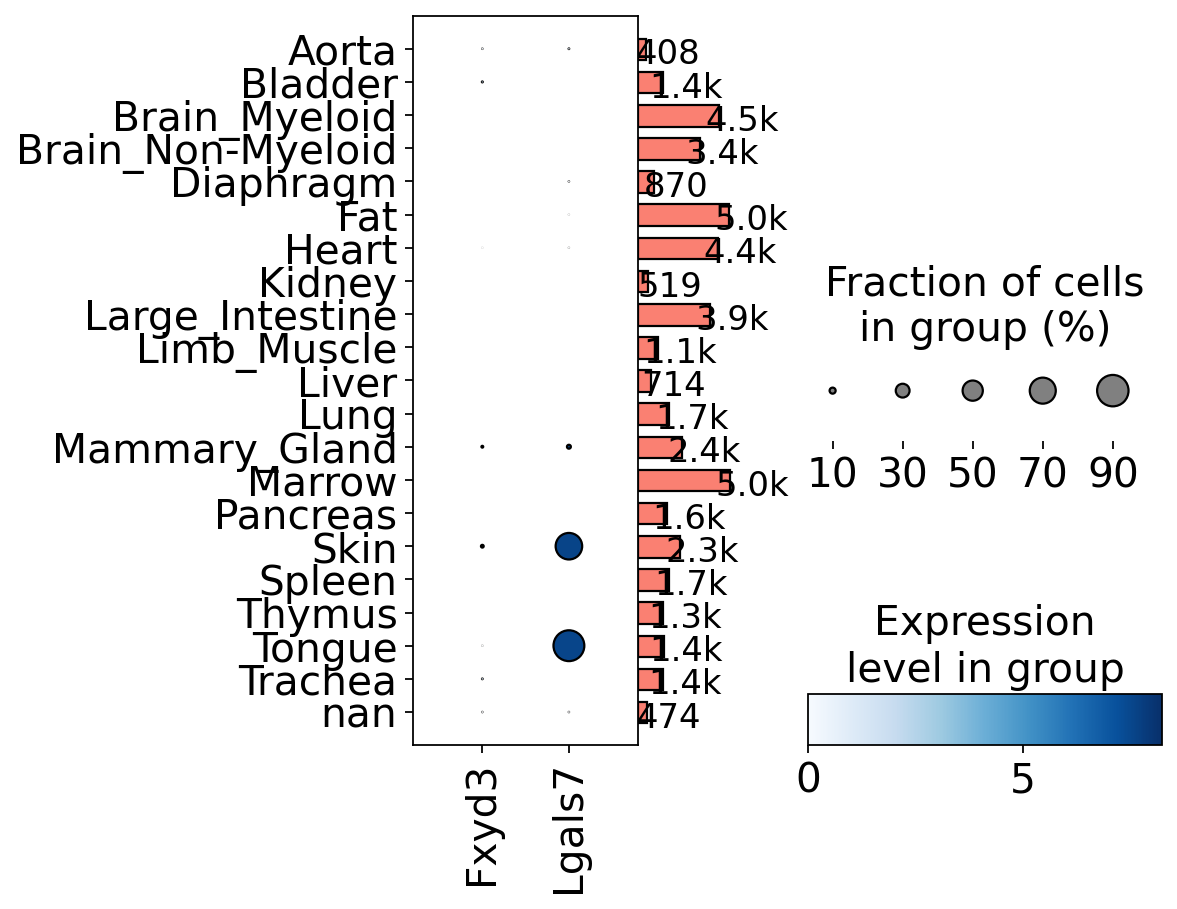

In [25]:
sc.set_figure_params(fontsize=22)
dp = sc.pl.dotplot(adata,data['genes'],groupby=data['grp'],expression_cutoff=float(data['cutoff']),mean_only_expressed=(data['mean_only_expressed'] == 'Yes'),
                       return_fig=True,figsize=(6,6))#
dp = dp.add_totals(size=0.8).legend(show_size_legend=True,width=3).style(cmap='Blues', dot_edge_color='black', dot_edge_lw=1, size_exponent=1.5)
dp.show()

In [28]:
#res.stderr.decode('utf-8')
#adata.to_df()[['BTK','CD9']]
#pd.concat(adata.obs)
adata.obs['None'] = 'all'
adata.obs

,cell_type,diagnosis,None
cell0,OL,MS,all
cell1,OL,Control,all
cell2,Astrocytes,Control,all
cell3,Astrocytes,MS,all
cell4,OPC,MS,all
...,...,...,...
cell46179,IN-PVALB,Control,all
cell46180,OL,MS,all
cell46181,IN-PVALB,Control,all
cell46182,Phagocytes,MS,all
